In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged-en-and-es-tweets-for-mental-disorder/merged_spanish_tweets.csv
/kaggle/input/merged-en-and-es-tweets-for-mental-disorder/merged_english_tweets.csv
/kaggle/input/sampled-tweets-en-and-es/en_tweets_sampled_300000.csv
/kaggle/input/sampled-tweets-en-and-es/es_tweets_sampled_250000.csv


In [2]:
es_data = pd.read_csv("/kaggle/input/merged-en-and-es-tweets-for-mental-disorder/merged_spanish_tweets.csv",
                   encoding='latin-1')
es_data.head()

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,ASD,1438328769169723398,2021-09-16,02:27:56,Ya sÃ¡quenme de aquÃ­ ð© HTTPURL,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
1,ASD,1437483061449474050,2021-09-13,18:27:23,@USUARIO AsÃ­ estaban ayer a quienes no les fu...,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
2,ASD,1437255836917719043,2021-09-13,03:24:29,@USUARIO Cuanta suerte tienen los que no se ba...,1.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
3,ASD,1437253903343554560,2021-09-13,03:16:48,"@USUARIO Tienes ex bonitas, sorry ð¤·ð»âï¸",1.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
4,ASD,1436143613243637794,2021-09-10,01:44:54,ESTO HTTPURL,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0


In [4]:
es_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663761 entries, 0 to 2663760
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   tweet_id              int64  
 2   day                   object 
 3   time                  object 
 4   tweet                 object 
 5   tweet_favorite_count  float64
 6   tweet_retweet_count   float64
 7   tweet_source          object 
 8   user_id               float64
 9   user_followers_count  float64
 10  user_friends_count    float64
 11  user_listed_count     float64
 12  user_statuses_count   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 264.2+ MB


In [ ]:
es_data = es_data.drop_duplicates(subset=['tweet_id'], keep='first')

In [23]:
es_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598371 entries, 0 to 2663760
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   tweet_id              int64  
 2   day                   object 
 3   time                  object 
 4   tweet                 object 
 5   tweet_favorite_count  float64
 6   tweet_retweet_count   float64
 7   tweet_source          object 
 8   user_id               float64
 9   user_followers_count  float64
 10  user_friends_count    float64
 11  user_listed_count     float64
 12  user_statuses_count   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 277.5+ MB


In [3]:
en_data = pd.read_csv("/kaggle/input/merged-en-and-es-tweets-for-mental-disorder/merged_english_tweets.csv",
                   encoding='latin-1')
en_data.head()

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,SCHIZOPHRENIA,1552179545943330816,2022-07-27,06:30:16,"""worst part ab working a graveyard schedule is...",0,0,Twitter for iPhone,1424746717342097413,133,93,0,2608
1,SCHIZOPHRENIA,1552079639983452160,2022-07-26,23:53:17,"""nah bruh cause wtf HTTPURL HTTPURL""",0,0,Twitter for iPhone,1424746717342097413,133,93,0,2608
2,SCHIZOPHRENIA,1552022423377039361,2022-07-26,20:05:55,"""he got me wagging my tail and shit""",3,0,Twitter for iPhone,1424746717342097413,133,93,0,2608
3,SCHIZOPHRENIA,1551902669689630720,2022-07-26,12:10:04,"""i think im just rlly high""",0,0,Twitter for iPhone,1424746717342097413,133,93,0,2608
4,SCHIZOPHRENIA,1551902641025757184,2022-07-26,12:09:57,"""the thought of people eating baked beans will...",0,0,Twitter for iPhone,1424746717342097413,133,93,0,2608


In [5]:
en_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170493 entries, 0 to 5170492
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   class                 object
 1   tweet_id              int64 
 2   day                   object
 3   time                  object
 4   tweet                 object
 5   tweet_favorite_count  int64 
 6   tweet_retweet_count   int64 
 7   tweet_source          object
 8   user_id               int64 
 9   user_followers_count  int64 
 10  user_friends_count    int64 
 11  user_listed_count     int64 
 12  user_statuses_count   int64 
dtypes: int64(8), object(5)
memory usage: 512.8+ MB


No duplicate data in EN tweets seems to exist

In [24]:
en_data = en_data.drop_duplicates(subset=['tweet_id'], keep='first')
en_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170493 entries, 0 to 5170492
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   class                 object
 1   tweet_id              int64 
 2   day                   object
 3   time                  object
 4   tweet                 object
 5   tweet_favorite_count  int64 
 6   tweet_retweet_count   int64 
 7   tweet_source          object
 8   user_id               int64 
 9   user_followers_count  int64 
 10  user_friends_count    int64 
 11  user_listed_count     int64 
 12  user_statuses_count   int64 
dtypes: int64(8), object(5)
memory usage: 512.8+ MB


# EDA

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

In [7]:
PALETTE = 'crest'

In [9]:
en_data.isnull().sum()/len(en_data)

class                   0.0
tweet_id                0.0
day                     0.0
time                    0.0
tweet                   0.0
tweet_favorite_count    0.0
tweet_retweet_count     0.0
tweet_source            0.0
user_id                 0.0
user_followers_count    0.0
user_friends_count      0.0
user_listed_count       0.0
user_statuses_count     0.0
dtype: float64

[Text(0, 0, 'SCHIZOPHRENIA'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, 'DEPRESSION'),
 Text(3, 0, 'ADHD'),
 Text(4, 0, 'AUTISM'),
 Text(5, 0, 'PTSD'),
 Text(6, 0, 'OCD'),
 Text(7, 0, 'ANXIETY'),
 Text(8, 0, 'BIPOLAR'),
 Text(9, 0, 'EATING DISORDER')]

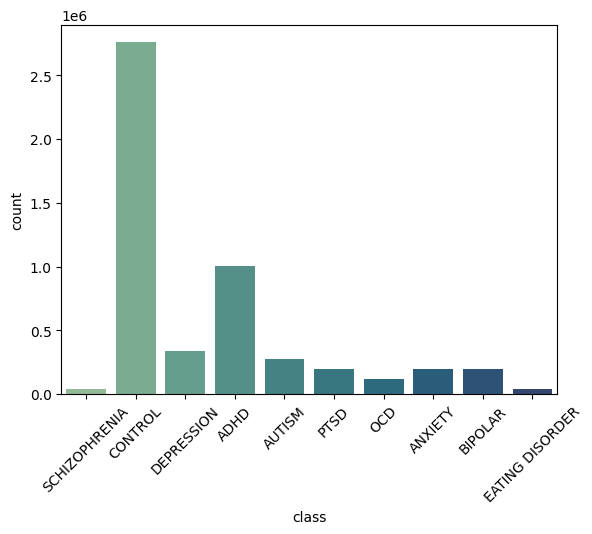

In [12]:
my_plot = sns.countplot(x ='class', data=en_data, palette= PALETTE);
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [14]:
en_data["class"].unique()

array(['SCHIZOPHRENIA', 'CONTROL', 'DEPRESSION', 'ADHD', 'AUTISM', 'PTSD',
       'OCD', 'ANXIETY', 'BIPOLAR', 'EATING DISORDER'], dtype=object)

In [10]:
es_data.isnull().sum()/len(es_data)

class                   0.000000
tweet_id                0.000000
day                     0.000000
time                    0.000000
tweet                   0.000000
tweet_favorite_count    0.024548
tweet_retweet_count     0.024548
tweet_source            0.024548
user_id                 0.024548
user_followers_count    0.024549
user_friends_count      0.024549
user_listed_count       0.024549
user_statuses_count     0.024549
dtype: float64

[Text(0, 0, 'ASD'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, ' HTTPURL'),
 Text(3, 0, 'HTTPURL'),
 Text(4, 0, 'Â¡Ya estamos al aire para cantar juntos ð\x9f\x8e¼! Â¿Te unes ï¸\x8f? HTTPURL'),
 Text(5, 0, 'EATING'),
 Text(6, 0, 'BIPOLAR'),
 Text(7, 0, 'ANXIETY'),
 Text(8, 0, 'PTSD'),
 Text(9, 0, 'SCHIZOPHRENIA'),
 Text(10, 0, 'OCD'),
 Text(11, 0, 'DEPRESSION'),
 Text(12, 0, 'ADHD')]

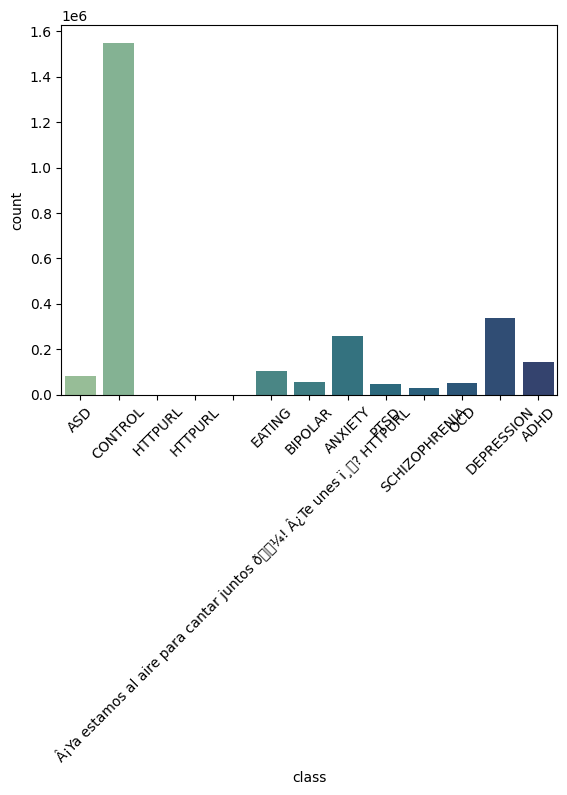

In [13]:
my_plot_es = sns.countplot(x ='class', data=es_data, palette= PALETTE);
my_plot_es.set_xticklabels(my_plot_es.get_xticklabels(), rotation=45)

In [15]:
es_data["class"].unique()

array(['ASD', 'CONTROL', ' HTTPURL', 'HTTPURL',
       'Â¡Ya estamos al aire para cantar juntos ð\x9f\x8e¼! Â¿Te unes ï¸\x8f? HTTPURL',
       'EATING', 'BIPOLAR', 'ANXIETY', 'PTSD', 'SCHIZOPHRENIA', 'OCD',
       'DEPRESSION', 'ADHD'], dtype=object)

In [16]:
es_data = es_data.drop(es_data[es_data['class'] == ' HTTPURL'].index)
es_data = es_data.drop(es_data[es_data['class'] == 'HTTPURL'].index)
es_data = es_data.drop(es_data[es_data['class'] == 'Â¡Ya estamos al aire para cantar juntos ð\x9f\x8e¼! Â¿Te unes ï¸\x8f? HTTPURL'].index)

es_data.head()

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
0,ASD,1438328769169723398,2021-09-16,02:27:56,Ya sÃ¡quenme de aquÃ­ ð© HTTPURL,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
1,ASD,1437483061449474050,2021-09-13,18:27:23,@USUARIO AsÃ­ estaban ayer a quienes no les fu...,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
2,ASD,1437255836917719043,2021-09-13,03:24:29,@USUARIO Cuanta suerte tienen los que no se ba...,1.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
3,ASD,1437253903343554560,2021-09-13,03:16:48,"@USUARIO Tienes ex bonitas, sorry ð¤·ð»âï¸",1.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0
4,ASD,1436143613243637794,2021-09-10,01:44:54,ESTO HTTPURL,0.0,0.0,Twitter for iPhone,9.882417e+17,102.0,162.0,0.0,3112.0


In [17]:
es_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2663757 entries, 0 to 2663760
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   tweet_id              int64  
 2   day                   object 
 3   time                  object 
 4   tweet                 object 
 5   tweet_favorite_count  float64
 6   tweet_retweet_count   float64
 7   tweet_source          object 
 8   user_id               float64
 9   user_followers_count  float64
 10  user_friends_count    float64
 11  user_listed_count     float64
 12  user_statuses_count   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 284.5+ MB


[Text(0, 0, 'ASD'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, 'EATING'),
 Text(3, 0, 'BIPOLAR'),
 Text(4, 0, 'ANXIETY'),
 Text(5, 0, 'PTSD'),
 Text(6, 0, 'SCHIZOPHRENIA'),
 Text(7, 0, 'OCD'),
 Text(8, 0, 'DEPRESSION'),
 Text(9, 0, 'ADHD')]

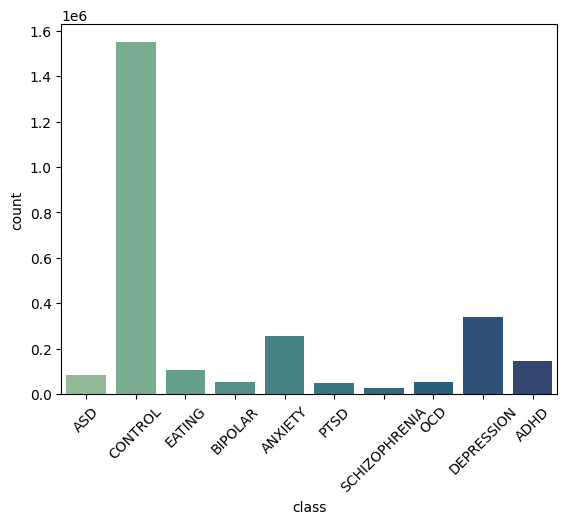

In [18]:
my_plot_es = sns.countplot(x ='class', data=es_data, palette= PALETTE);
my_plot_es.set_xticklabels(my_plot_es.get_xticklabels(), rotation=45)

In [19]:
es_data['class'].value_counts()

class
CONTROL          1550037
DEPRESSION        339927
ANXIETY           256657
ADHD              145498
EATING            103778
ASD                84488
BIPOLAR            54562
OCD                53076
PTSD               48218
SCHIZOPHRENIA      27516
Name: count, dtype: int64

## After removing duplicates

[Text(0, 0, 'ASD'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, 'EATING'),
 Text(3, 0, 'BIPOLAR'),
 Text(4, 0, 'ANXIETY'),
 Text(5, 0, 'PTSD'),
 Text(6, 0, 'SCHIZOPHRENIA'),
 Text(7, 0, 'OCD'),
 Text(8, 0, 'DEPRESSION'),
 Text(9, 0, 'ADHD')]

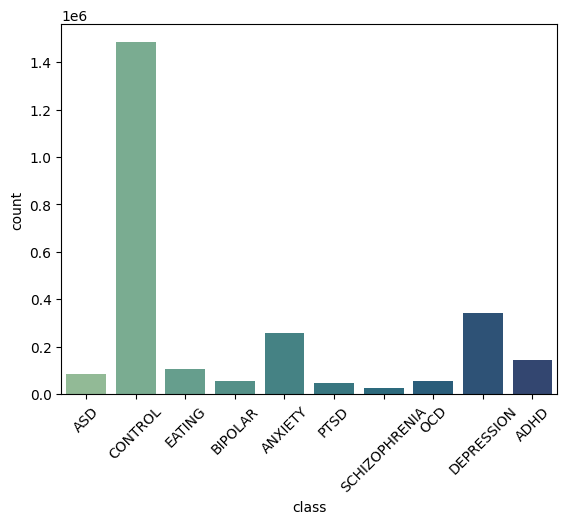

In [25]:
my_plot_es = sns.countplot(x ='class', data=es_data, palette= PALETTE);
my_plot_es.set_xticklabels(my_plot_es.get_xticklabels(), rotation=45)

In [20]:
en_data["class"].value_counts()

class
CONTROL            2761555
ADHD               1009002
DEPRESSION          336997
AUTISM              273435
BIPOLAR             200425
ANXIETY             195944
PTSD                195519
OCD                 119545
SCHIZOPHRENIA        40178
EATING DISORDER      37893
Name: count, dtype: int64

In [26]:
en_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170493 entries, 0 to 5170492
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   class                 object
 1   tweet_id              int64 
 2   day                   object
 3   time                  object
 4   tweet                 object
 5   tweet_favorite_count  int64 
 6   tweet_retweet_count   int64 
 7   tweet_source          object
 8   user_id               int64 
 9   user_followers_count  int64 
 10  user_friends_count    int64 
 11  user_listed_count     int64 
 12  user_statuses_count   int64 
dtypes: int64(8), object(5)
memory usage: 512.8+ MB


In [27]:
en_data.drop(['day','time','tweet_favorite_count','tweet_retweet_count',
              'tweet_source', 'user_id', 'user_followers_count',
              'user_friends_count', 'user_statuses_count'],axis = 1,inplace = True)
en_data.head()

,class,tweet_id,tweet,user_listed_count
0,SCHIZOPHRENIA,1552179545943330816,"""worst part ab working a graveyard schedule is...",0
1,SCHIZOPHRENIA,1552079639983452160,"""nah bruh cause wtf HTTPURL HTTPURL""",0
2,SCHIZOPHRENIA,1552022423377039361,"""he got me wagging my tail and shit""",0
3,SCHIZOPHRENIA,1551902669689630720,"""i think im just rlly high""",0
4,SCHIZOPHRENIA,1551902641025757184,"""the thought of people eating baked beans will...",0


In [28]:
en_data.drop(['user_listed_count'],axis = 1,inplace = True)
en_data.head()

,class,tweet_id,tweet
0,SCHIZOPHRENIA,1552179545943330816,"""worst part ab working a graveyard schedule is..."
1,SCHIZOPHRENIA,1552079639983452160,"""nah bruh cause wtf HTTPURL HTTPURL"""
2,SCHIZOPHRENIA,1552022423377039361,"""he got me wagging my tail and shit"""
3,SCHIZOPHRENIA,1551902669689630720,"""i think im just rlly high"""
4,SCHIZOPHRENIA,1551902641025757184,"""the thought of people eating baked beans will..."


In [29]:
es_data.drop(['day','time','tweet_favorite_count','tweet_retweet_count',
              'tweet_source', 'user_id', 'user_followers_count',
              'user_friends_count', 'user_statuses_count', 'user_listed_count'], axis = 1,inplace = True)
es_data.head()

,class,tweet_id,tweet
0,ASD,1438328769169723398,Ya sÃ¡quenme de aquÃ­ ð© HTTPURL
1,ASD,1437483061449474050,@USUARIO AsÃ­ estaban ayer a quienes no les fu...
2,ASD,1437255836917719043,@USUARIO Cuanta suerte tienen los que no se ba...
3,ASD,1437253903343554560,"@USUARIO Tienes ex bonitas, sorry ð¤·ð»âï¸"
4,ASD,1436143613243637794,ESTO HTTPURL


## Count Tweets Lengths before Preprocessing

In [32]:
def find_outliers_iqr(data, feature_column):
    """
    Find outliers in a given feature using the IQR method.

    Parameters:
    - data: pandas DataFrame
    - feature_column: str, the name of the column containing the feature

    Returns:
    - outliers: pandas DataFrame containing outliers
    """

    # Select the specified feature column
    feature_values = data[feature_column]

    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = feature_values.quantile(0.25)
    Q3 = feature_values.quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(feature_values < lower_bound) | (feature_values > upper_bound)]
    
    print(f"Outliers ratio is {round(len(outliers)/len(data), 2)}")
    
    return outliers

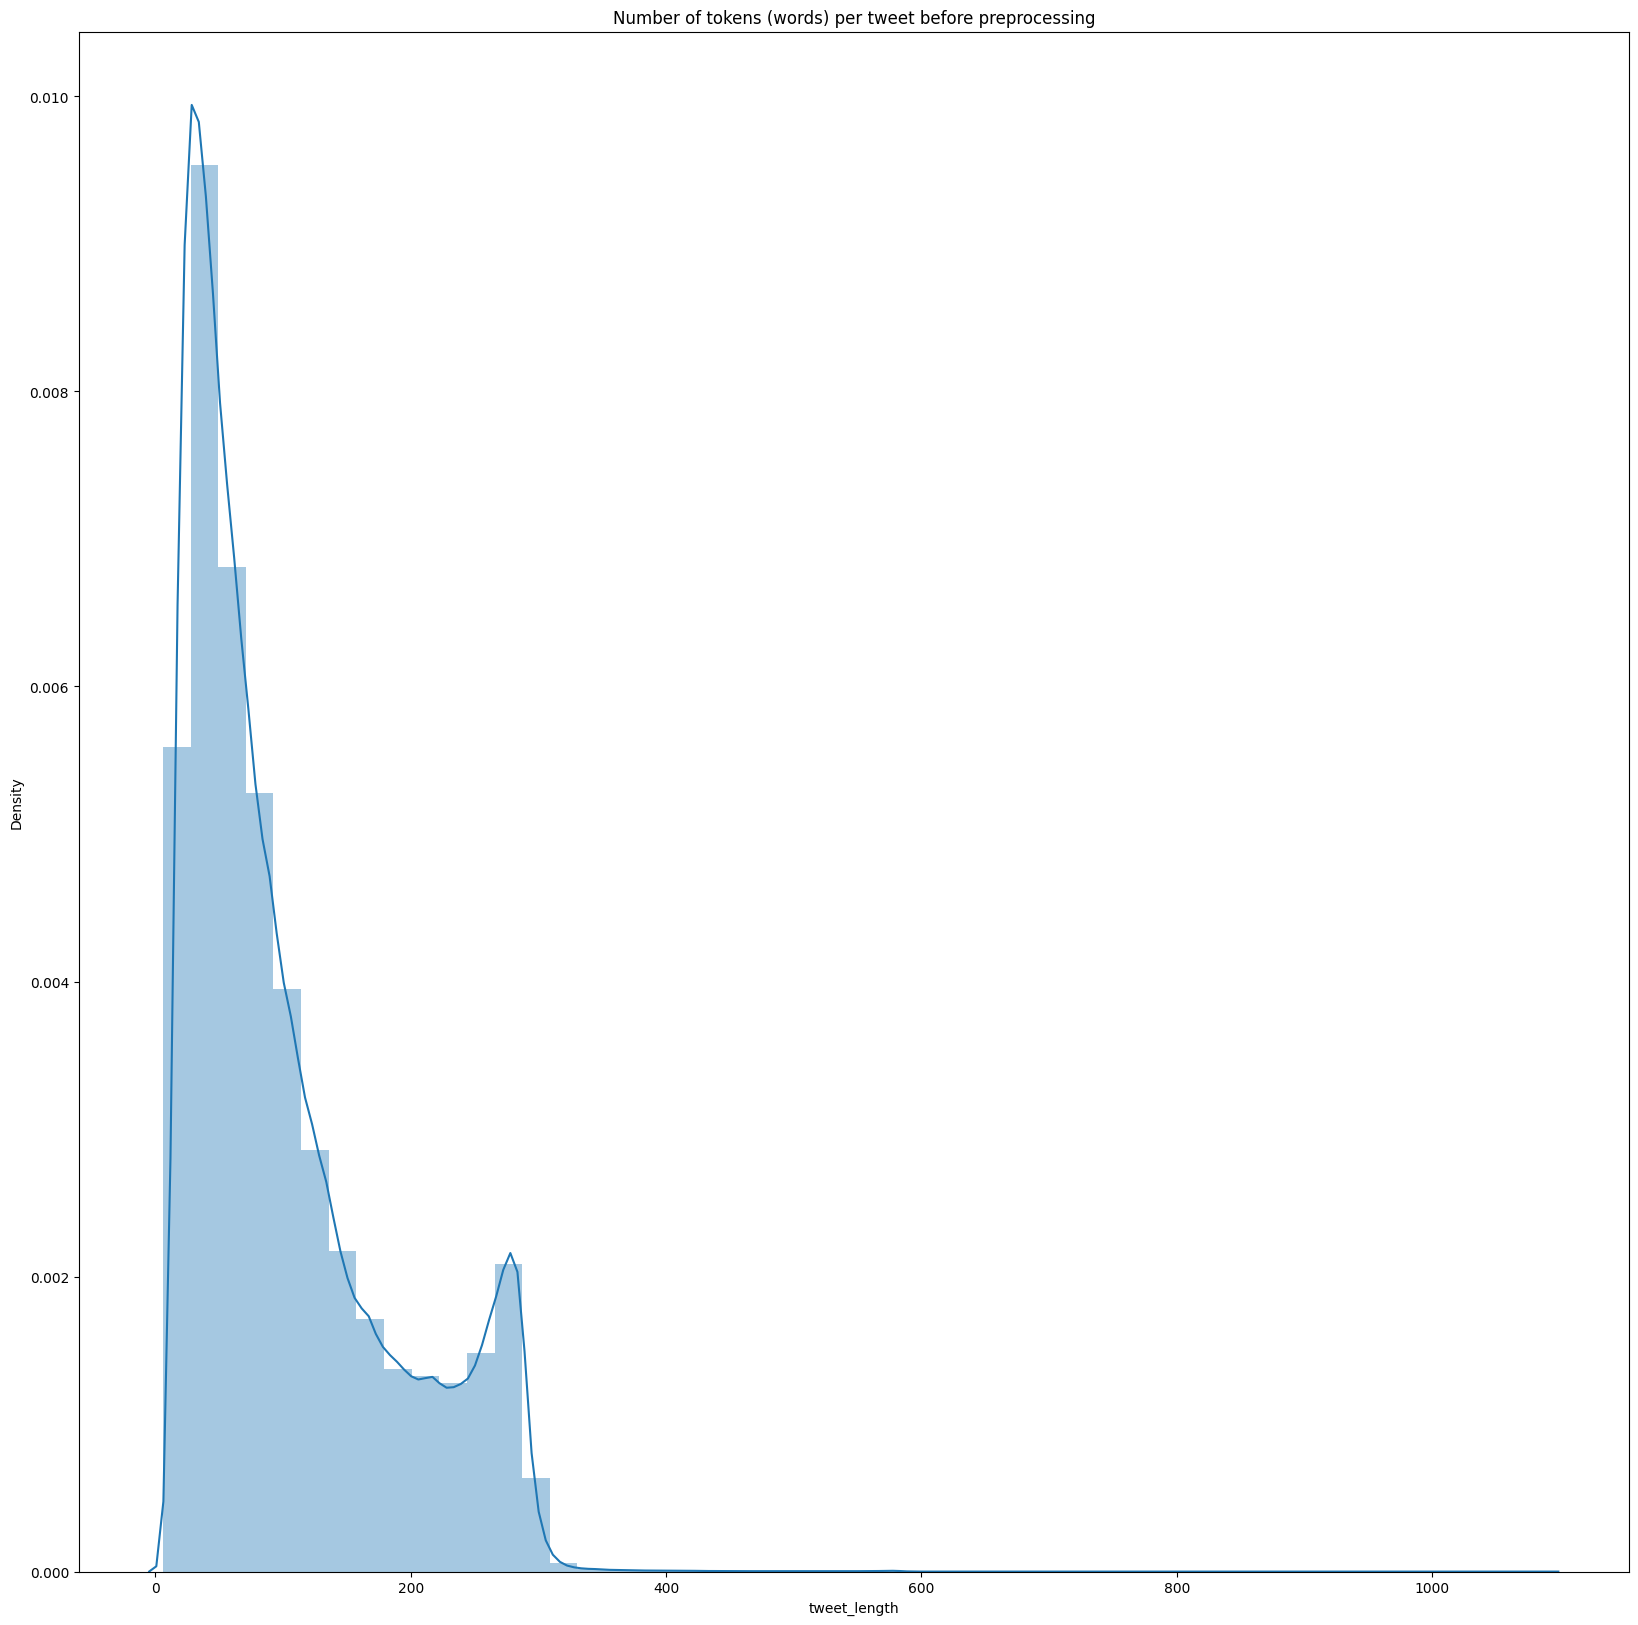

In [30]:
en_data['tweet_length'] = en_data['tweet'].str.len()
fig = plt.figure(figsize=(20,20))
sns.distplot(en_data['tweet_length'])
plt.title('Number of tokens (words) per tweet before preprocessing')
plt.show()

In [33]:
outliers_en_df = find_outliers_iqr(en_data, "tweet_length")

Outliers ratio is 0.01


In [34]:
outliers_en_df.head()

,class,tweet_id,tweet,tweet_length
2522,SCHIZOPHRENIA,1535701532062130176,"""I dont know anymore man whether to believe in...",293
7300,SCHIZOPHRENIA,1295678372325064704,"""@USER @USER @USER The reason why I dont suppo...",300
7550,SCHIZOPHRENIA,1287022133126799361,"""@USER @USER David Lammy . Do you think me as ...",293
8022,SCHIZOPHRENIA,1277364831394414595,"""@USER @USER A French mix race mental health n...",294
8046,SCHIZOPHRENIA,1277207973144772609,"""@USER @USER @USER @USER Was cocaine ever avai...",295


In [35]:
outliers_en_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54292 entries, 2522 to 5167302
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         54292 non-null  object
 1   tweet_id      54292 non-null  int64 
 2   tweet         54292 non-null  object
 3   tweet_length  54292 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ MB


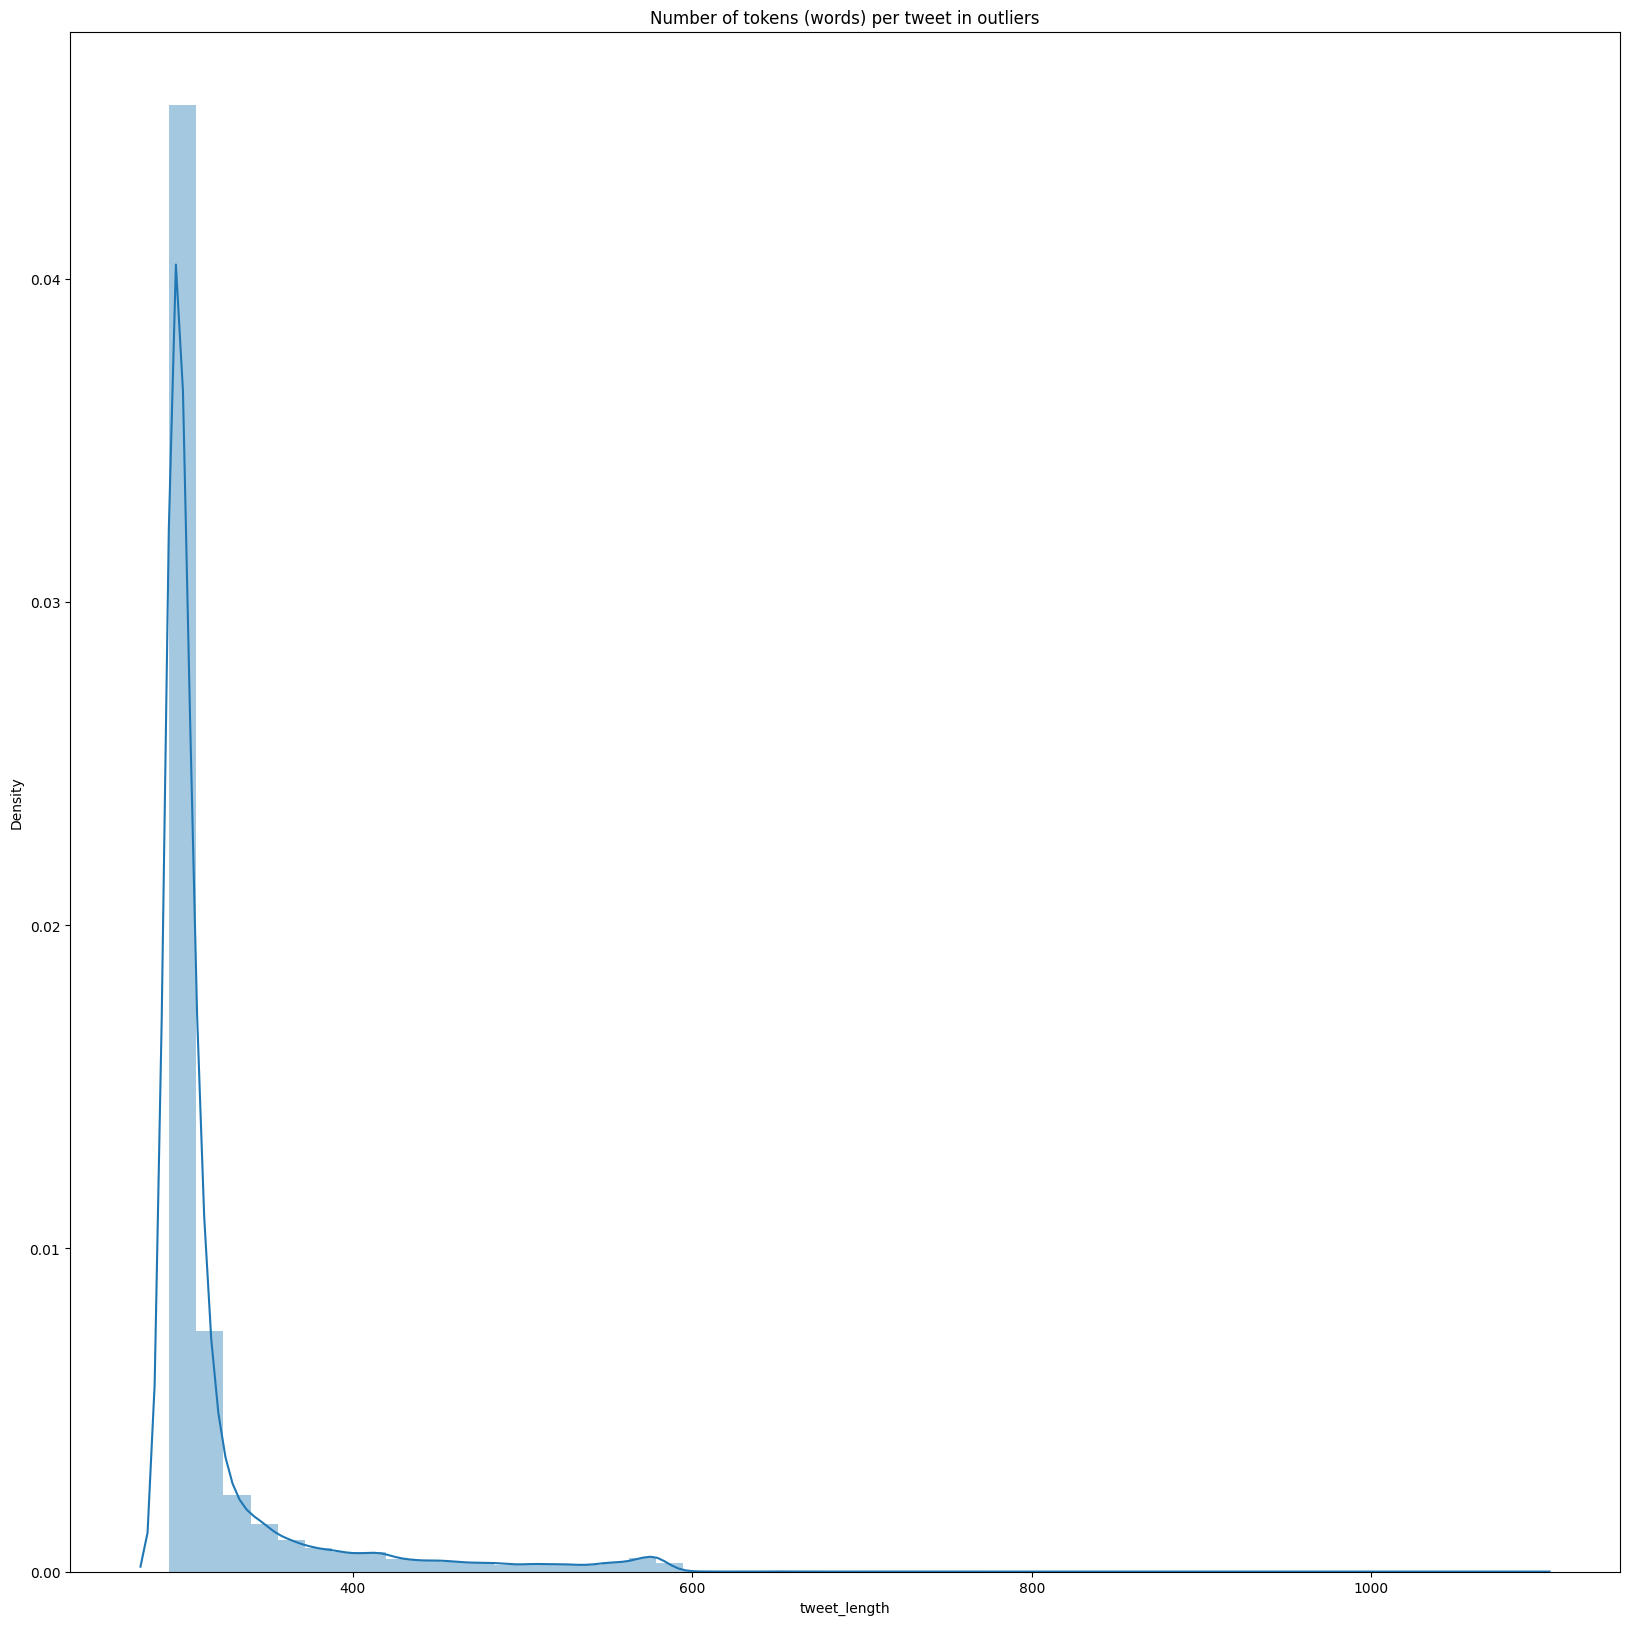

In [36]:
fig = plt.figure(figsize=(20,20))
sns.distplot(outliers_en_df['tweet_length'])
plt.title('Number of tokens (words) per tweet in outliers')
plt.show()

[Text(0, 0, 'SCHIZOPHRENIA'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, 'DEPRESSION'),
 Text(3, 0, 'ADHD'),
 Text(4, 0, 'AUTISM'),
 Text(5, 0, 'PTSD'),
 Text(6, 0, 'OCD'),
 Text(7, 0, 'ANXIETY'),
 Text(8, 0, 'BIPOLAR'),
 Text(9, 0, 'EATING DISORDER')]

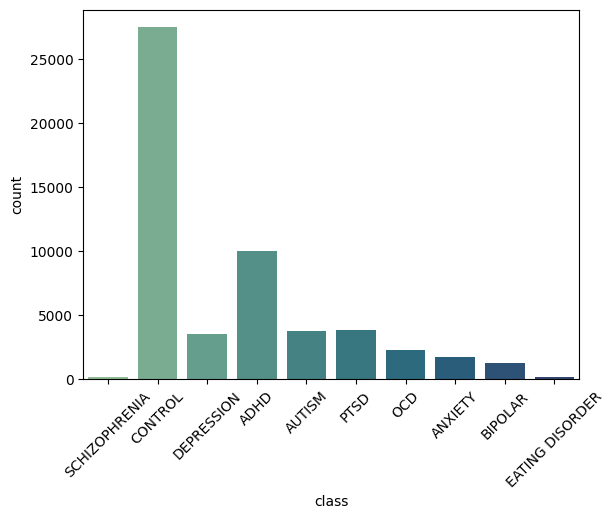

In [41]:
ol_plot_en = sns.countplot(x ='class', data=outliers_en_df, palette= PALETTE);
ol_plot_en.set_xticklabels(ol_plot_en.get_xticklabels(), rotation=45)

In [42]:
en_filtered = en_data[~en_data['tweet_id'].isin(outliers_en_df['tweet_id'])]
en_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5116201 entries, 0 to 5170492
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   class         object
 1   tweet_id      int64 
 2   tweet         object
 3   tweet_length  int64 
dtypes: int64(2), object(2)
memory usage: 195.2+ MB


In [43]:
en_filtered["class"].value_counts()

class
CONTROL            2734088
ADHD                998976
DEPRESSION          333444
AUTISM              269655
BIPOLAR             199168
ANXIETY             194189
PTSD                191677
OCD                 117246
SCHIZOPHRENIA        40021
EATING DISORDER      37737
Name: count, dtype: int64

In [50]:
# Set the number of samples you want from each class
sample_size = 30000

# List of classes
classes = ['CONTROL', 'ADHD', 'DEPRESSION', 'AUTISM', 'BIPOLAR', 'ANXIETY', 'PTSD', 'OCD', 'SCHIZOPHRENIA', 'EATING DISORDER']

# Initialize an empty list to store the sampled dataframes
sampled_en_dfs = []

# Loop through each class and sample the desired number of records
for cls in tqdm(classes):
    sampled_df = en_filtered[en_filtered['class'] == cls].sample(n=min(sample_size, len(en_filtered[en_filtered['class'] == cls])), random_state=42)
    sampled_en_dfs.append(sampled_df)

# Concatenate all sampled dataframes
en_df_sampled = pd.concat(sampled_en_dfs)

# Display the result
print(en_df_sampled['class'].value_counts())

100%|██████████| 10/10 [00:16<00:00,  1.67s/it]

class
CONTROL            30000
ADHD               30000
DEPRESSION         30000
AUTISM             30000
BIPOLAR            30000
ANXIETY            30000
PTSD               30000
OCD                30000
SCHIZOPHRENIA      30000
EATING DISORDER    30000
Name: count, dtype: int64


In [51]:
en_df_sampled.to_csv("en_tweets_sampled_300000.csv")

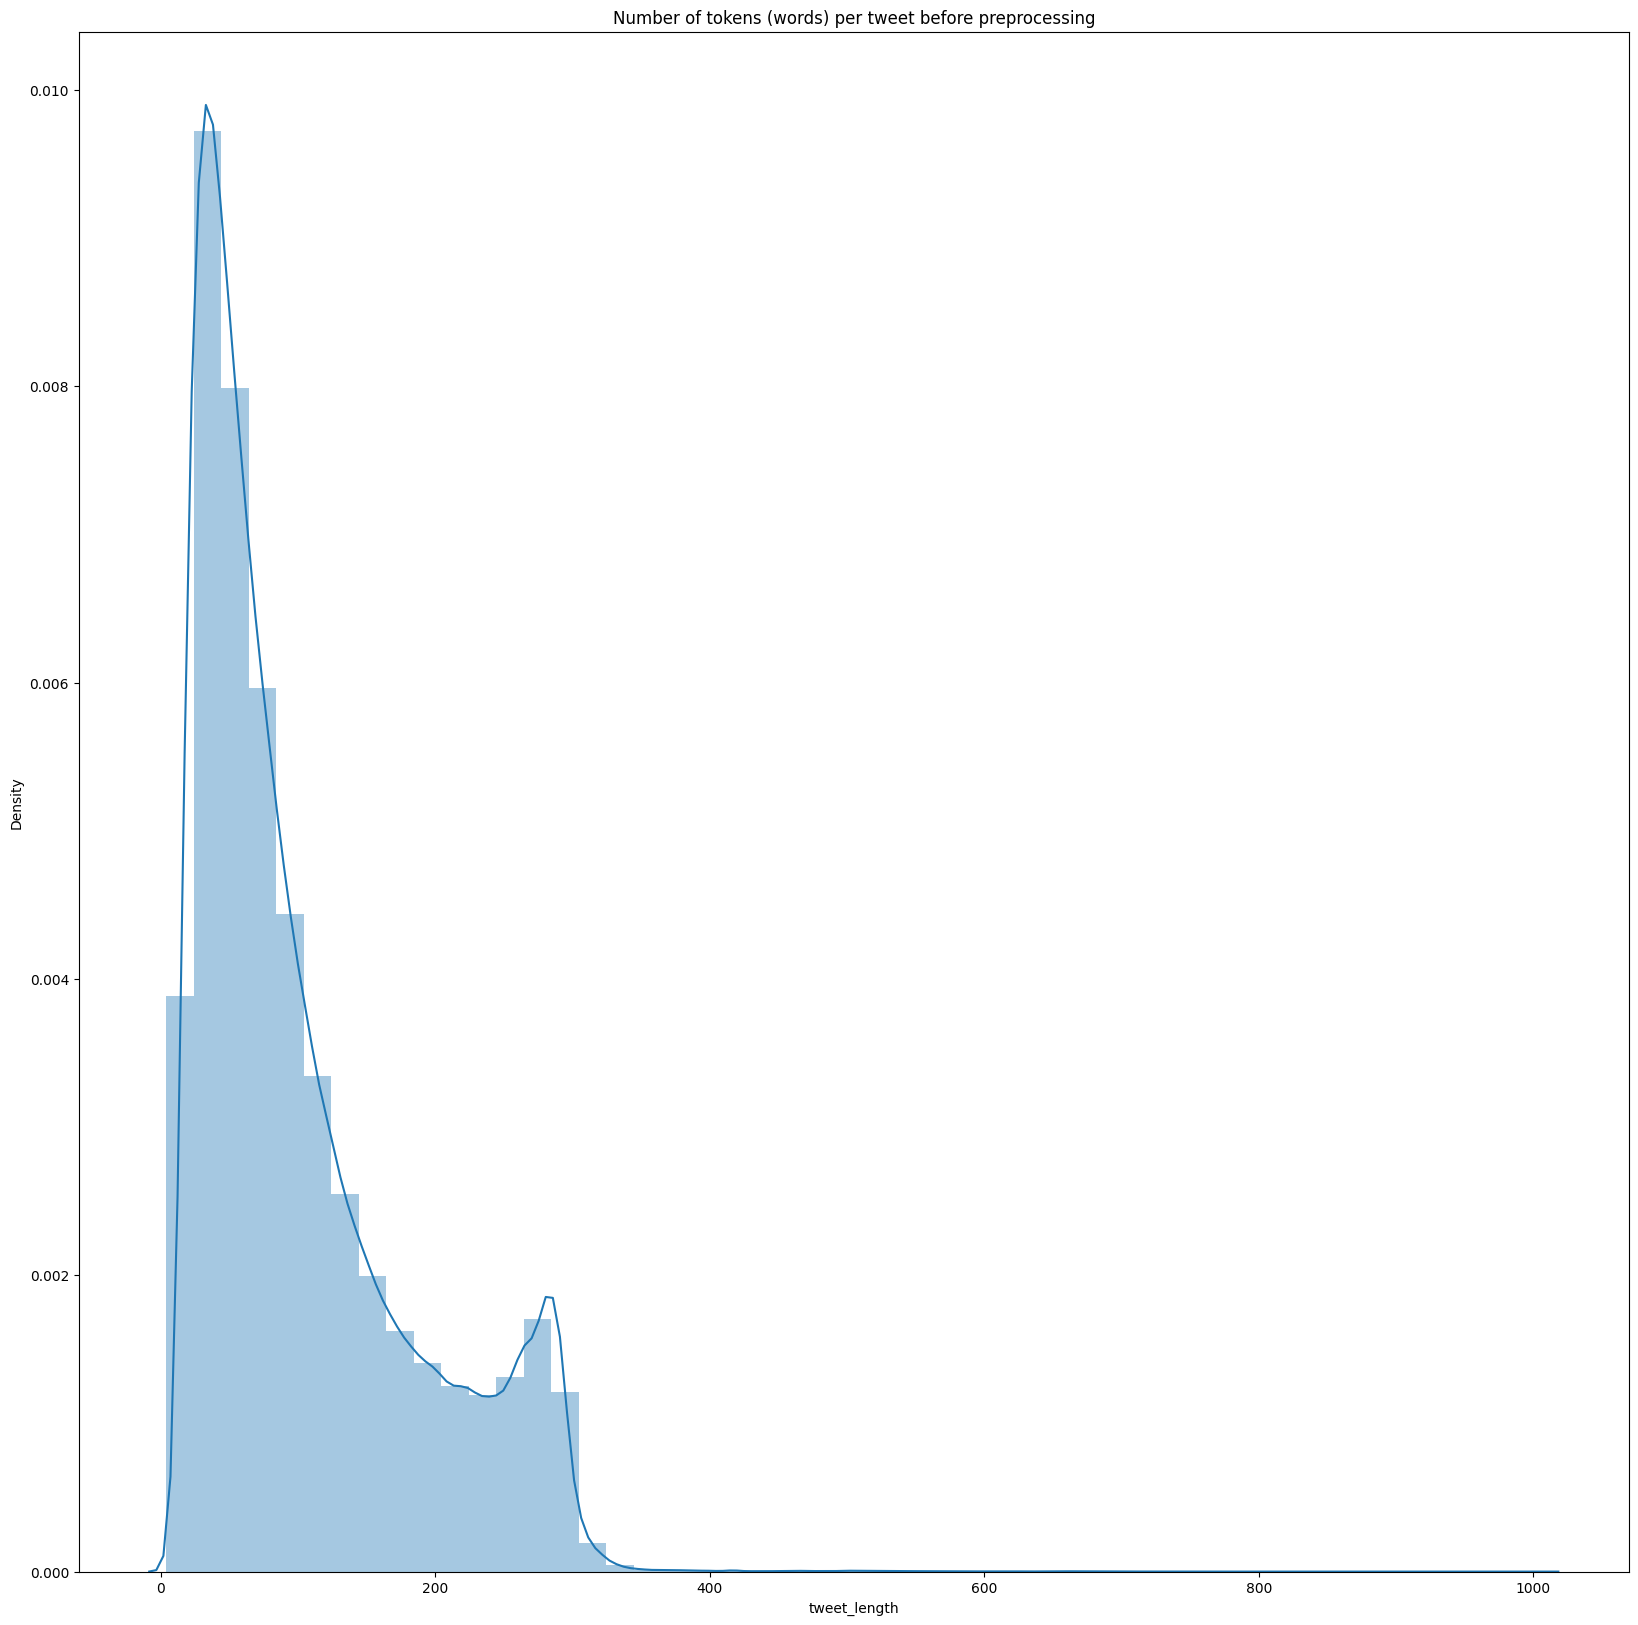

In [31]:
es_data['tweet_length'] = es_data['tweet'].str.len()
fig = plt.figure(figsize=(20,20))
sns.distplot(es_data['tweet_length'])
plt.title('Number of tokens (words) per tweet before preprocessing')
plt.show()

In [37]:
outliers_es_df = find_outliers_iqr(es_data, "tweet_length")

Outliers ratio is 0.03


In [39]:
outliers_es_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65075 entries, 12 to 2663698
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         65075 non-null  object
 1   tweet_id      65075 non-null  int64 
 2   tweet         65075 non-null  object
 3   tweet_length  65075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


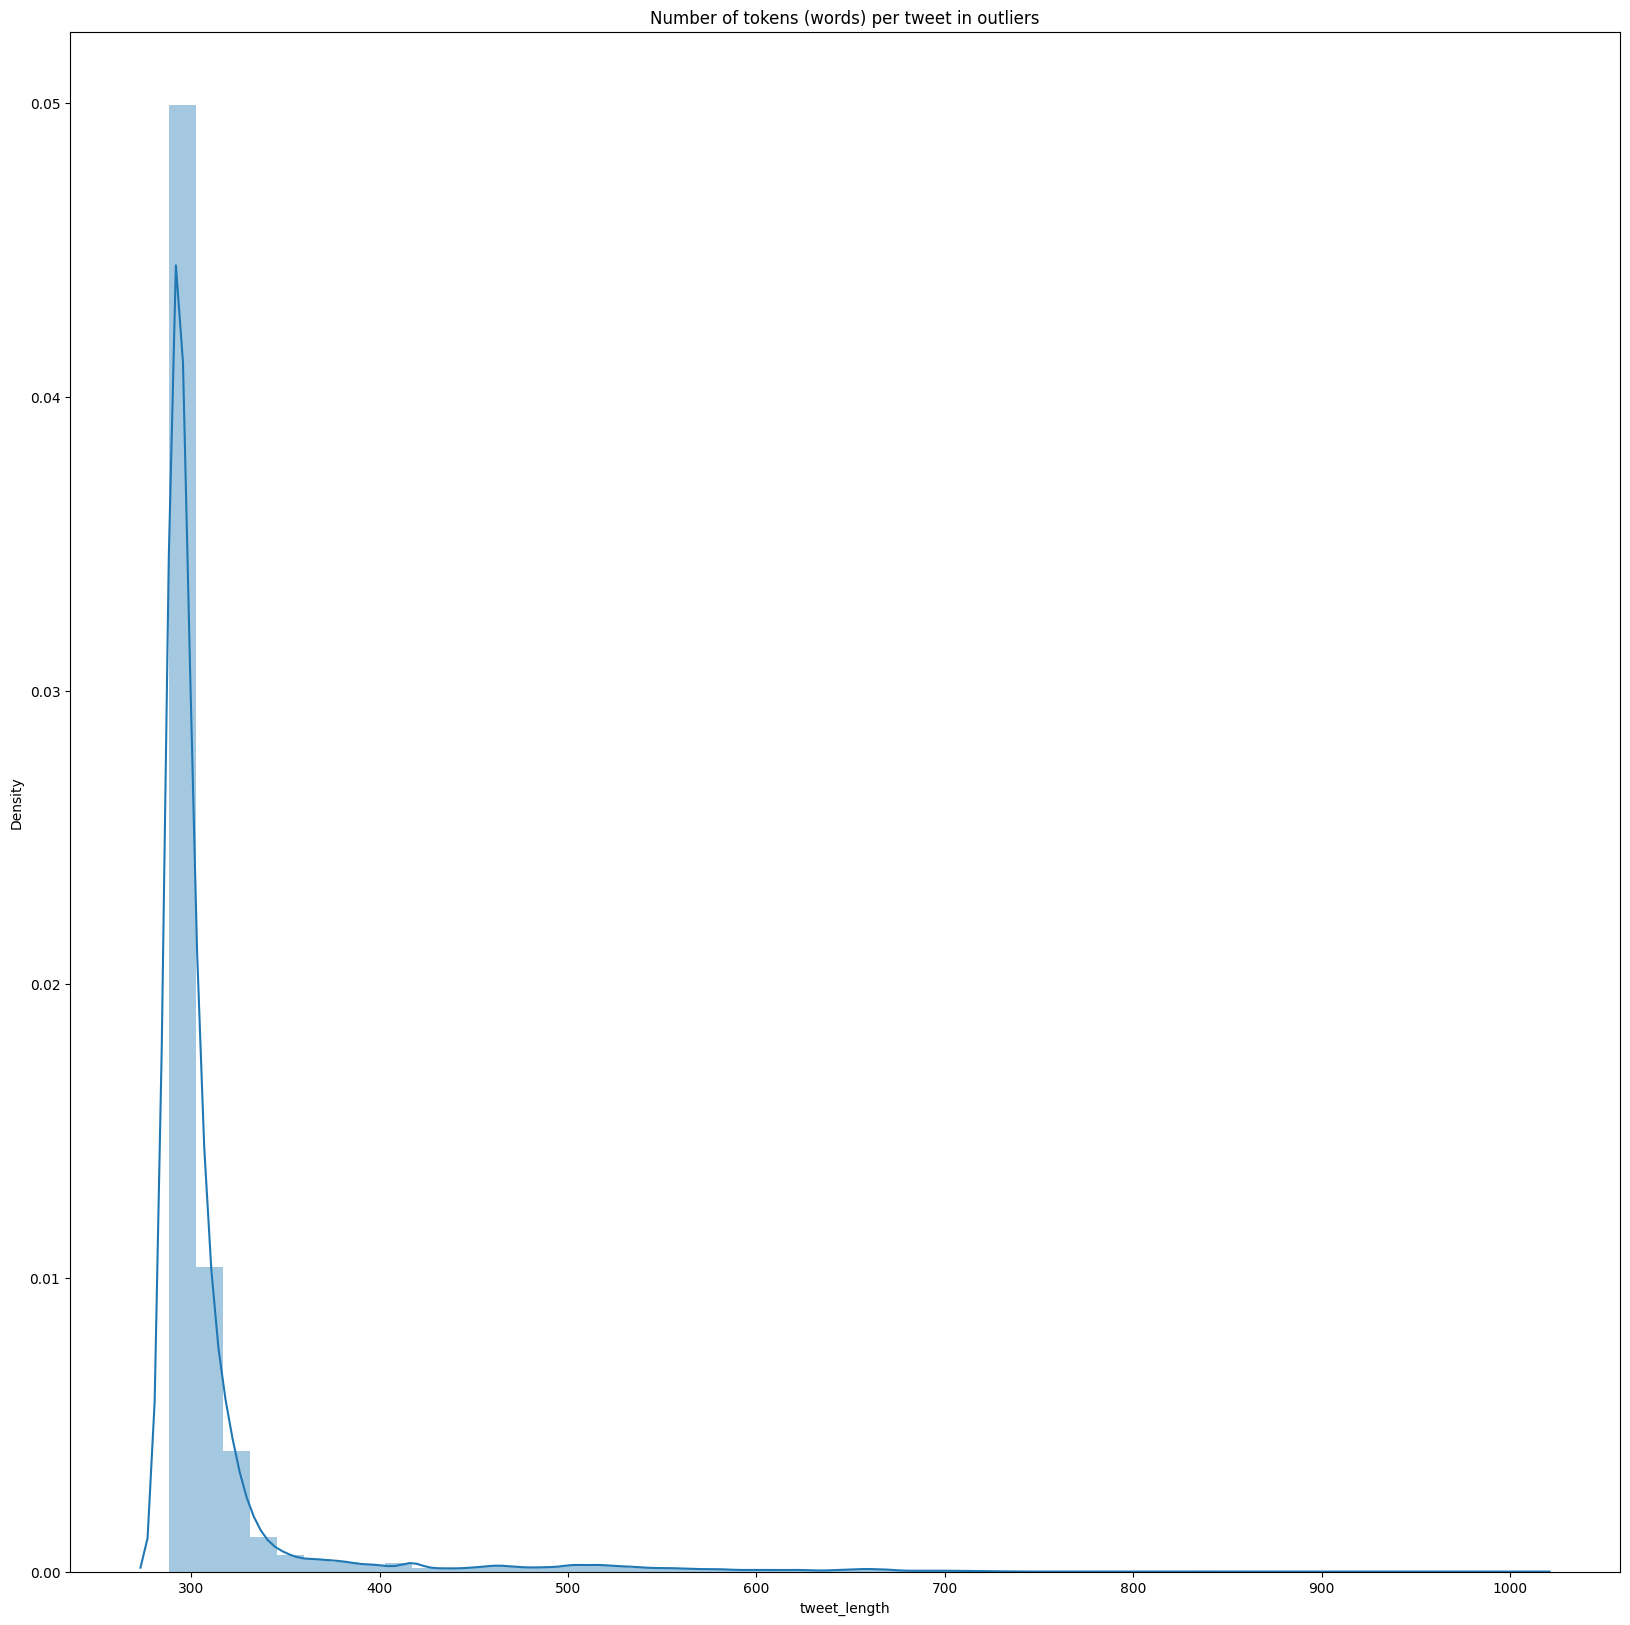

In [38]:
fig = plt.figure(figsize=(20,20))
sns.distplot(outliers_es_df['tweet_length'])
plt.title('Number of tokens (words) per tweet in outliers')
plt.show()

[Text(0, 0, 'ASD'),
 Text(1, 0, 'CONTROL'),
 Text(2, 0, 'EATING'),
 Text(3, 0, 'BIPOLAR'),
 Text(4, 0, 'ANXIETY'),
 Text(5, 0, 'PTSD'),
 Text(6, 0, 'SCHIZOPHRENIA'),
 Text(7, 0, 'OCD'),
 Text(8, 0, 'DEPRESSION'),
 Text(9, 0, 'ADHD')]

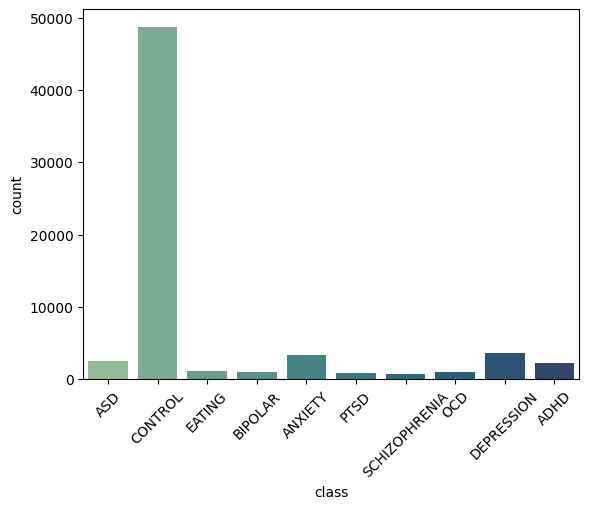

In [40]:
ol_plot_es = sns.countplot(x ='class', data=outliers_es_df, palette= PALETTE);
ol_plot_es.set_xticklabels(ol_plot_es.get_xticklabels(), rotation=45)

In [44]:
es_filtered = es_data[~es_data['tweet_id'].isin(outliers_es_df['tweet_id'])]
es_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2533296 entries, 0 to 2663760
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   class         object
 1   tweet_id      int64 
 2   tweet         object
 3   tweet_length  int64 
dtypes: int64(2), object(2)
memory usage: 96.6+ MB


In [45]:
es_filtered["class"].value_counts()

class
CONTROL          1435939
DEPRESSION        336344
ANXIETY           253332
ADHD              143262
EATING            102621
ASD                81984
BIPOLAR            53533
OCD                52118
PTSD               47323
SCHIZOPHRENIA      26840
Name: count, dtype: int64

In [46]:
from tqdm import tqdm

In [47]:
# Set the number of samples you want from each class
sample_size = 25000

# List of classes
classes = ['CONTROL', 'DEPRESSION', 'ANXIETY', 'ADHD', 'EATING', 'ASD', 
           'BIPOLAR', 'OCD', 'PTSD', 'SCHIZOPHRENIA']

# Initialize an empty list to store the sampled dataframes
sampled_es_dfs = []

# Loop through each class and sample the desired number of records
for cls in tqdm(classes):
    sampled_df = es_filtered[es_filtered['class'] == cls].sample(n=min(sample_size, len(es_filtered[es_filtered['class'] == cls])), random_state=42)
    sampled_es_dfs.append(sampled_df)

# Concatenate all sampled dataframes
es_df_sampled = pd.concat(sampled_es_dfs)

# Display the result
print(es_df_sampled['class'].value_counts())

100%|██████████| 10/10 [00:08<00:00,  1.17it/s]

class
CONTROL          25000
DEPRESSION       25000
ANXIETY          25000
ADHD             25000
EATING           25000
ASD              25000
BIPOLAR          25000
OCD              25000
PTSD             25000
SCHIZOPHRENIA    25000
Name: count, dtype: int64


In [48]:
es_df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 123700 to 2114028
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   class         250000 non-null  object
 1   tweet_id      250000 non-null  int64 
 2   tweet         250000 non-null  object
 3   tweet_length  250000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 9.5+ MB


In [49]:
es_df_sampled.to_csv("es_tweets_sampled_250000.csv")

# Load Sampled Datasets

In [20]:
es_df_sampled = pd.read_csv("/kaggle/input/sampled-tweets-en-and-es/es_tweets_sampled_250000.csv",
                   encoding='latin-1')
es_df_sampled.head()

,Unnamed: 0,class,tweet_id,tweet,tweet_length
0,123700,CONTROL,1450886781662994436,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",83
1,467096,CONTROL,1419069713548783617,@USUARIO dale like por las dudas ajajajaj,41
2,1251086,CONTROL,1197880231668965378,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,264
3,772932,CONTROL,1295510330701942785,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",40
4,569135,CONTROL,1419787186573086722,"@USUARIO Bueno, se eso se trata",31


In [21]:
en_df_sampled = pd.read_csv("/kaggle/input/sampled-tweets-en-and-es/en_tweets_sampled_300000.csv",
                   encoding='latin-1')
en_df_sampled.head()

,Unnamed: 0,class,tweet_id,tweet,tweet_length
0,1448141,CONTROL,1517602273454608385,"""@USER ""ÃÂ i think james cameron has been dir...",81
1,707623,CONTROL,1453089606551982089,"""@USER @USER @USER 6/10 joke youre better than...",52
2,2571637,CONTROL,1026936104317014017,"""Fraud and Abuse Spotlight: Florida and North ...",61
3,2195917,CONTROL,1521805936670744577,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",31
4,2073574,CONTROL,1338565435831115776,"""Just posted a video @USER San Diego, Californ...",57


# Preprocessing

In [4]:
!pip install pysentimiento

In [5]:
from pysentimiento.preprocessing import preprocess_tweet

In [6]:
import spacy as sp

In [22]:
import dask.dataframe as ddf
import time, re
from datetime import datetime

In [36]:
# ---------------------------------------
# CHANGE to the language of your choice (English/Spanish)...
languageName = 'spanish'
languageCode = 'es'

n_partitions = 6
# ---------------------------------------

In [38]:
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_sm

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 80.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [39]:
!python -m spacy download es

⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl (12.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [40]:
nlp = sp.load('es_core_news_sm', disable=['parser', 'ner', 'textcat']) if languageName == 'spanish' else sp.load('en_core_web_sm', disable=['parser', 'ner', 'textcat'])
nlp.add_pipe('sentencizer')

In [41]:
STOPWORDS_ESP = set(['a', 'ah', 'ahi', 'ahí', 'al', 'algo', 'algunas', 'algunos', 'alli', 'allí', 'ante', 'antes',
                    'aqui', 'aquí', 'asi', 'así', 'b', 'c', 'cada', 'cómo', 'con', 'contra', 'cual', 'cuál', 'cuando',
                    'cuándo', 'd', 'da', 'de', 'del', 'desde', 'donde', 'dónde', 'durante', 'e', 'el', 'en', 'entre',
                    'era', 'erais', 'éramos', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos',
                    'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados',
                    'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estara', 'estarán', 'estaran', 'estarás',
                    'estaras', 'estaré', 'estare', 'estaréis', 'estareis', 'estaría', 'estaria', 'estaríais', 'estariais',
                    'estaríamos', 'estariamos', 'estarían', 'estarian', 'estarías', 'estarias', 'estas', 'este',
                    'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras',
                    'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste',
                    'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estabamos',
                    'estáis', 'estais', 'están', 'estan', 'estás', 'estas', 'esté', 'este', 'estéis', 'esteis',
                    'estén', 'esten', 'estés', 'estes', 'f', 'for', 'ft', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras',
                    'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis',
                    'fuéramos', 'fueramos', 'fuésemos', 'fuesemos', 'g', 'go', 'gt', 'h', 'ha', 'ha', 'habida',
                    'habidas', 'habido', 'habidos', 'habiendo', 'habremos', 'habrá', 'habra', 'habrán', 'habran',
                    'habrás', 'habras', 'habré', 'habre', 'habréis', 'habreis', 'habría', 'habria', 'habríais', 'habriais',
                    'habríamos', 'habriamos', 'habrían', 'habrian', 'habrías', 'habrias', 'habéis', 'habeis',
                    'había', 'habia', 'habíais', 'habiais', 'habíamos', 'habiamos', 'habían', 'habian', 'habías', 'habias',
                    'han', 'has', 'hasta', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'hayais', 'he',
                    'hemos', 'hube', 'hubiera', 
                    'hubierais', 'hubieran', 'hubieras', 'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses',
                    'hubimos', 'hubiste', 'hubisteis', 'hubiéramos', 'hubieramos', 'hubiésemos', 'hubiesemos', 'hubo',
                    'i', 'j', 'k', 'l', 'lt', 'la', 'las', 'los', 'm', 'más', 'mas', 'mi', 'mis', 'mucho', 'muchos', 'muy', 'n', 'nada',
                    'ni', 'o', 'oh', 'otra',
                    'otras', 'otro', 'otros', 'p', 'para', 'pero', 'poco', 'por', 'pork', 'porq', 'porque', 'q',
                    'que', 'quien', 'quienes', 'qué', 'que', 'r', 'rt', 's', 'sea', 'seamos', 'sean', 'seas', 'sentid',
                    'sentida', 'sentidas', 'sentido', 'sentidos', 'ser', 'seremos', 'será', 'serán', 'serás', 'seré',
                    'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis',
                    'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'seais',
                    'siente', 'sin',
                    'sintiendo', 'sobre', 'sois', 'somos', 'son', 'soy', 'su', 'sus', 't', 'también', 'tanto',
                    'tendremos', 'tendrá', 'tendrán', 'tendrás', 'tendré', 'tendréis', 'tendría', 'tendríais',
                    'tendríamos', 'tendrían', 'tendrías',
                    'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais',
                    'tendriamos', 'tendrian', 'tendrias',
                    'tened', 'tenemos', 'tener', 'tenga', 'tengamos', 'tengan',
                    'tengas', 'tengo', 'tengáis', 'tengais', 'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'teneis',
                    'tenía', 'teníais', 'teníamos', 'tenían', 'tenías',
                    'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tiene', 'tienen', 'tienes', 'todo', 'todos',
                    'tu', 'tus', 'tuve', 'tuviera', 'tuvierais', 'tuvieran', 'tuvieras', 'tuvieron', 'tuviese',
                    'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste', 'tuvisteis', 'tuviéramos',
                    'tuviésemos', 'tuvo', 'u', 'un', 'una', 'uno', 'unos', 'v', 'va', 'vez', 'w', 'x', 'xk', 'xq',
                    'y', 'ya', 'z'])

STOPWORDS_ENG = set(['a', 'about', 'above', 'after', 'again', 'against', 'ah', 'ai', 'ain', 'ain"t', 'aint', 'all', 'am',
                    'amp', 'an', 'and', 'any', 'are', 'aren', 'aren"t', 'arent', 'as', 'at', 'b', 'bc', 'be', 'because',
                    'been',	'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', 'couldn', 'couldn"t',
                    'couldnt', 'd', 'did', 'didn', 'didn"t', 'didnt', 'do', 'does', 'doesn', 'doesn"t', 'doesnt',
                    'doing', 'don', 'don"t', 'dont', 'down',
                    'during', 'e', 'each', 'f', 'few', 'for', 'from', 'ft', 'further', 'g', 'get', 'getta', 'gon',
                    'gonna', 'h', 'had', 'hadn', 'hadn"t', 'hadnt', 'has', 'hasn', 'hasn"t', 'hasnt', 'have', 'haven',
                    'haven"t', 'havent',
                    'having', 'here', 'how', 'if', 'in', 'into', 'is',
                    'isn', 'isn"t', 'isnt', 'it"s', 'j', 'just', 'k', 'l', 'll', 'lt', 'm', 'ma',
                    'mightn', 'mightn"t', 'mightnt', 'more', 'most', 'mustn', 'mustn"t', 'n',
                    'na', 'needn', 'needn"t', 'neednt',
                    'nor', 'now', 'o', 'of', 'off', 'oh', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own',
                    'p', 'q', 'r', 're', 'rn', 'rt', 's', 'same', 'shan', 'shan"t', 'shant', 'she"s', 'shes',
                    'should', 'should"ve', 'shouldve', 'shouldn', 'shouldn"t', 'shouldnt', 'so', 'some', 'such',
                    't', 'ta', 'than', 'that', 'that"ll', 'thatll',
                    'the', 'then', 'there', 'these', 'this', 'those', 'through', 'to', 'too', 'under', 'until',
                    'u', 'up', 'ur', 'v', 've', 'very', 'vs', 'w', 'was', 'wasn', 'wasn"t', 'wasnt', 'were',
                    'weren', 'weren"t', 'werent', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why',
                    'will', 'with', 'won', 'won"t', 'wont', 'wouldn', 'wouldn"t', 'wouldnt', 'x', 'y', 'yall',
                    'you"d', 'youd', 'you"ll', 'youll', 'you"re', 'youre', 'you"ve', 'youve' 'z'])

In [42]:
# -------------------------------------
# Remove stopwords
def removeStopwords(text, languageCode):
    stopwords = STOPWORDS_ESP if languageCode == 'es' else STOPWORDS_ENG

    text = ' '.join([word for word in text.split() if word not in stopwords])

    return re.sub(' +', ' ', text).strip()

In [43]:
# Remove punctuation
def removePunctuation(text):
    """ Elimina signos de puntuación incluidos ¿! (usados en español) """

    punctuationStr = r'[_━🇧.▪"\[!"#\$%&\(\)\*\+,-\./:;<=>\?\^`{\|}~¿¡¬‘’£¥€¢₩°«»“”— ´¨¸•¤‹›–…·\]]'

    text = re.sub(punctuationStr, ' ', text) 

    return re.sub(' +', ' ', text).strip()

In [44]:
# Preprocess tweet
def helper_preprocess(text, demojiFlag):
    """ Utiliza la función de pysentimiento para pre-procesar tweets, basicamente quita el nombre del usuario y coloca la etiqueta @usuario,
    para el url deja la palabra URL nada más, quita el símbolo de hashtag, no quita emojis ni los convierte a palabras , quita letras repetidas en las palabras,
    normaliza risas jajajja --> jajaja """

    return preprocess_tweet(text, lang=languageCode, user_token="@usuario",
                                    url_token="url", preprocess_hashtags=True,
                                    hashtag_token=None, demoji=demojiFlag,
                                    shorten=3, normalize_laughter=True,
                                    emoji_wrapper="emoji")

In [45]:
es_df_sampled.head()

,Unnamed: 0,class,tweet_id,tweet,tweet_length
0,123700,CONTROL,1450886781662994436,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",83
1,467096,CONTROL,1419069713548783617,@USUARIO dale like por las dudas ajajajaj,41
2,1251086,CONTROL,1197880231668965378,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,264
3,772932,CONTROL,1295510330701942785,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",40
4,569135,CONTROL,1419787186573086722,"@USUARIO Bueno, se eso se trata",31


In [46]:
# -------------------------------------
# Lemmatization and POS tag
# -------------------------------------
def lemmatizeAndPOStagText(text):
    """ Se utiliza spacy para la lemmatizacion de las palabras y obtener su POS tag """

    # nlp es parte de spacy
    doc = nlp(text)

    lista_lemmatized = []
    lista_postags_text = []

    for token in doc:
        lista_lemmatized.append(token.lemma_)
        lista_postags_text.append(f'{token.lemma_}_{token.pos_}')


    text1 = ' '.join(lista_lemmatized).strip()
    text2 = ' '.join(lista_postags_text).strip()

    return text1, text2

In [47]:
# -------------------------------------
def processText(allText, demojiFlag):
    """ Limpia toda la basura del texto y devuelve el texto limpio """

    # Remove extra newlines
    allText = [re.sub(r'[\r|\n|\r\n]+', ' ', t) for t in allText]

    # Remove extra whitespace
    allText = [re.sub(' +', ' ', t).strip() for t in allText]

    # Replace symbols (eg. I’m --> I'm   that´s --> that's)
    allText = [re.sub('’', '\'', t) for t in allText]
    allText = [re.sub('”', '\'', t) for t in allText]
    allText = [re.sub('´', '\'', t) for t in allText]
    allText = [re.sub('"', '\'', t) for t in allText]

    allText = [re.sub('‑', '-', t) for t in allText]
    allText = [re.sub('—', '-', t) for t in allText]

    # Preprocess tweet using pysentimiento
    allText = [helper_preprocess(t, demojiFlag) for t in allText]

    allText = [removePunctuation(t) for t in allText]

    # Lowercase
    allText = [t.lower() for t in allText]

    return allText

In [48]:
def cleanProcessDataframe(df):
    """ Procesar el texto y aplicar todas las técnicas programadas anteriormente, también divide la fecha... """

    clean_tweets = processText(df['tweet'].values, demojiFlag=False)

    result1 = []
    result2 = []
    for t in clean_tweets:
        lst1, lst2 = lemmatizeAndPOStagText(t)
        result1.append(lst1)
        result2.append(lst2)

    df['clean_tweet_lemma'] = result1
    df['clean_tweet_lemma_postags'] = result2


    clean_tweets_nostop = [removeStopwords(text, languageCode) for text in clean_tweets]

    result1 = []
    result2 = []
    for t in clean_tweets_nostop:
        lst1, lst2 = lemmatizeAndPOStagText(t)
        result1.append(lst1)
        result2.append(lst2)


    df['clean_tweet_nostop_lemma'] = result1
    df['clean_tweet_nostop_lemma_postags'] = result2


    return df

In [49]:
# -------------------------------------
def convertNum(value):
    return 0 if (value == np.nan) else value

def convertText(value):
    return '' if (value == np.nan) else value

In [23]:
en_df_sampled.head()

,Unnamed: 0,class,tweet_id,tweet,tweet_length
0,1448141,CONTROL,1517602273454608385,"""@USER ""ÃÂ i think james cameron has been dir...",81
1,707623,CONTROL,1453089606551982089,"""@USER @USER @USER 6/10 joke youre better than...",52
2,2571637,CONTROL,1026936104317014017,"""Fraud and Abuse Spotlight: Florida and North ...",61
3,2195917,CONTROL,1521805936670744577,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",31
4,2073574,CONTROL,1338565435831115776,"""Just posted a video @USER San Diego, Californ...",57


In [24]:
en_df_sampled['clean_tweet_lemma'] = ''
en_df_sampled['clean_tweet_lemma_postags'] = ''

en_df_sampled['clean_tweet_nostop_lemma'] = ''
en_df_sampled['clean_tweet_nostop_lemma_postags'] = ''


dask_dataframe = ddf.from_pandas(en_df_sampled, npartitions=n_partitions)

print(en_df_sampled.shape)
result = dask_dataframe.map_partitions(cleanProcessDataframe, meta=en_df_sampled)
en_df_sampled = result.compute()

# Organizar columnas
en_cleanData = en_df_sampled[['class', 'tweet_id',
                'tweet',
                'clean_tweet_lemma', 'clean_tweet_lemma_postags',
                'clean_tweet_nostop_lemma', 'clean_tweet_nostop_lemma_postags',
                ]]


en_cleanData = en_cleanData[en_cleanData['clean_tweet_lemma'] != ''] # más rapido que remove

print(en_cleanData.shape)
en_cleanData.head()
# en_cleanData.to_csv("en_sampled_clean.cvs")

(300000, 9)
(300000, 7)


,class,tweet_id,tweet,clean_tweet_lemma,clean_tweet_lemma_postags,clean_tweet_nostop_lemma,clean_tweet_nostop_lemma_postags
0,CONTROL,1517602273454608385,"""@USER ""ÃÂ i think james cameron has been dir...",' @usuario ' ãâ I think james cameron have ...,'_PUNCT @usuario_X '_PROPN ãâ_NOUN _SPACE I_...,' @usuario ' ãâ I think james cameron direct ...,'_PUNCT @usuario_X '_NOUN ãâ_PROPN I_PRON thi...
1,CONTROL,1453089606551982089,"""@USER @USER @USER 6/10 joke youre better than...",' @usuario @usuario @usuario 6 10 joke you re ...,'_PUNCT @usuario_ADV @usuario_PROPN @usuario_P...,' @usuario @usuario @usuario 6 10 joke well th...,'_PUNCT @usuario_ADV @usuario_PROPN @usuario_P...
2,CONTROL,1026936104317014017,"""Fraud and Abuse Spotlight: Florida and North ...",' fraud and abuse spotlight florida and north ...,'_PUNCT fraud_NOUN and_CCONJ abuse_NOUN spotli...,' fraud abuse spotlight florida north texas ht...,'_PUNCT fraud_NOUN abuse_NOUN spotlight_NOUN f...
3,CONTROL,1521805936670744577,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",' just why ãâââãâââãâââ httpurl ','_PUNCT just_ADV why_SCONJ ãâââãâââãââ...,' just ãâââãâââãâââ httpurl ','_PUNCT just_ADV ãâââãâââãâââ_PROPN h...
4,CONTROL,1338565435831115776,"""Just posted a video @USER San Diego, Californ...",' just post a video @usuario san diego califor...,'_PUNCT just_ADV post_VERB a_DET video_NOUN @u...,' just post video @usuario san diego californi...,'_PUNCT just_ADV post_VERB video_NOUN @usuario...


In [50]:
es_df_sampled['clean_tweet_lemma'] = ''
es_df_sampled['clean_tweet_lemma_postags'] = ''

es_df_sampled['clean_tweet_nostop_lemma'] = ''
es_df_sampled['clean_tweet_nostop_lemma_postags'] = ''


dask_dataframe = ddf.from_pandas(es_df_sampled, npartitions=n_partitions)

print(en_df_sampled.shape)
result = dask_dataframe.map_partitions(cleanProcessDataframe, meta=es_df_sampled)
es_df_sampled = result.compute()

# Organizar columnas
es_cleanData = es_df_sampled[['class', 'tweet_id',
                'tweet',
                'clean_tweet_lemma', 'clean_tweet_lemma_postags',
                'clean_tweet_nostop_lemma', 'clean_tweet_nostop_lemma_postags',
                ]]


es_cleanData = es_cleanData[es_cleanData['clean_tweet_lemma'] != ''] # más rapido que remove

print(es_cleanData.shape)
es_cleanData.head()


(300000, 9)
(250000, 7)


,class,tweet_id,tweet,clean_tweet_lemma,clean_tweet_lemma_postags,clean_tweet_nostop_lemma,clean_tweet_nostop_lemma_postags
0,CONTROL,1450886781662994436,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",acuerdo senado marina acciãâ³n estratãâgica ...,acuerdo_NOUN senado_ADJ marina_NOUN acciãâ³n_...,acuerdo senado marina acciãâ³n estratãâgica ...,acuerdo_NOUN senado_ADJ marina_NOUN acciãâ³n_...
1,CONTROL,1419069713548783617,@USUARIO dale like por las dudas ajajajaj,@usuario dalar like por el duda jajar,@usuario_PROPN dalar_VERB like_NOUN por_ADP el...,@usuario dalar like duda jajar,@usuario_PROPN dalar_VERB like_ADJ duda_NOUN j...
2,CONTROL,1197880231668965378,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,ãââ â ãâ compartir él que llevar dentro se...,ãââ_PROPN â_VERB ãâ _VERB compartir_VERB él...,ãââ â ãâ compartir él llevar dentro acto a...,ãââ_PROPN â_VERB ãâ _VERB compartir_VERB él...
3,CONTROL,1295510330701942785,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",él hashtag bueno él hashtag malo y él hashtag ...,él_PRON hashtag_VERB bueno_ADJ él_PRON hashtag...,él hashtag bueno él hashtag malo él hashtag fr...,él_PRON hashtag_VERB bueno_ADJ él_PRON hashtag...
4,CONTROL,1419787186573086722,"@USUARIO Bueno, se eso se trata",@usuario bueno él ese él tratar,@usuario_NOUN bueno_ADJ él_PRON ese_PRON él_PR...,@usuario bueno él él tratar,@usuario_NOUN bueno_ADJ él_PRON él_PRON tratar...


In [25]:
def clean_tweet(text):
    # Replace @usuario and HTTPURL with empty string
    text = re.sub(r'@[\w]+', '', text)  # Removes anything starting with @ and followed by word characters
    text = re.sub(r'httpurl', '', text)  # Removes the placeholder HTTPURL
    return text.strip()

In [53]:
def clean_tweet_hashtags(text):
    text = re.sub(r'hashtag', '', text)  # Removes the placeholder hashtag
    return text.strip()

In [ ]:
en_cleanData['clean_tweet_nostop_lemma'] = en_cleanData.progress_apply(lambda row: clean_tweet_hashtags(row['clean_tweet_nostop_lemma']), axis=1)
# Display the dataframe with the cleaned tweets


In [55]:
en_cleanData[['clean_tweet_nostop_lemma']].head()

,clean_tweet_nostop_lemma
0,ãâ I think james cameron direct sequel new zea...
1,6 10 joke well this
2,fraud abuse spotlight florida north texas
3,just ãâââãâââãâââ
4,just post video san diego california


In [57]:
en_cleanData.to_csv("en_sampled_clean_v2.csv")

In [56]:
es_cleanData['clean_tweet_nostop_lemma'] = es_cleanData.progress_apply(lambda row: clean_tweet_hashtags(row['clean_tweet_nostop_lemma']), axis=1)
# Display the dataframe with the cleaned tweets
es_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

100%|██████████| 250000/250000 [00:03<00:00, 68161.73it/s]


,tweet,clean_tweet_nostop_lemma
0,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",acuerdo senado marina acciãâ³n estratãâgica ...
1,@USUARIO dale like por las dudas ajajajaj,dalar like duda jajar
2,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,ãââ â ãâ compartir él llevar dentro acto amor...
3,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",él bueno él malo él freir
4,"@USUARIO Bueno, se eso se trata",bueno él él tratar


In [28]:
from tqdm import tqdm

tqdm.pandas()

In [29]:
en_cleanData['clean_tweet_nostop_lemma'] = en_cleanData.progress_apply(lambda row: clean_tweet(row['clean_tweet_nostop_lemma']), axis=1)
# Display the dataframe with the cleaned tweets
en_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

100%|██████████| 300000/300000 [00:05<00:00, 59247.90it/s]


,tweet,clean_tweet_nostop_lemma
0,"""@USER ""ÃÂ i think james cameron has been dir...",' ' ãâ I think james cameron direct sequel n...
1,"""@USER @USER @USER 6/10 joke youre better than...",' 6 10 joke well this '
2,"""Fraud and Abuse Spotlight: Florida and North ...",' fraud abuse spotlight florida north texas '
3,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",' just ãâââãâââãâââ '
4,"""Just posted a video @USER San Diego, Californ...",' just post video san diego california '


In [51]:
es_cleanData['clean_tweet_nostop_lemma'] = es_cleanData.progress_apply(lambda row: clean_tweet(row['clean_tweet_nostop_lemma']), axis=1)
# Display the dataframe with the cleaned tweets
es_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

100%|██████████| 250000/250000 [00:04<00:00, 60089.95it/s]


,tweet,clean_tweet_nostop_lemma
0,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",acuerdo senado marina acciãâ³n estratãâgica ...
1,@USUARIO dale like por las dudas ajajajaj,dalar like duda jajar
2,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,ãââ â ãâ compartir él llevar dentro acto a...
3,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",él hashtag bueno él hashtag malo él hashtag freir
4,"@USUARIO Bueno, se eso se trata",bueno él él tratar


In [30]:
en_cleanData['clean_tweet_nostop_lemma'] = en_cleanData['clean_tweet_nostop_lemma'].str.replace("[^a-zA-Z]", "")

en_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

,tweet,clean_tweet_nostop_lemma
0,"""@USER ""ÃÂ i think james cameron has been dir...",' ' ãâ I think james cameron direct sequel n...
1,"""@USER @USER @USER 6/10 joke youre better than...",' 6 10 joke well this '
2,"""Fraud and Abuse Spotlight: Florida and North ...",' fraud abuse spotlight florida north texas '
3,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",' just ãâââãâââãâââ '
4,"""Just posted a video @USER San Diego, Californ...",' just post video san diego california '


In [31]:
pattern = r'[^\w\s]'

# Use regular expressions to remove special characters from the 'text' column
en_cleanData['clean_tweet_nostop_lemma'] = en_cleanData['clean_tweet_nostop_lemma'].replace(pattern, '', regex=True)

# Print the updated DataFrame
en_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

,tweet,clean_tweet_nostop_lemma
0,"""@USER ""ÃÂ i think james cameron has been dir...",ãâ I think james cameron direct sequel new ...
1,"""@USER @USER @USER 6/10 joke youre better than...",6 10 joke well this
2,"""Fraud and Abuse Spotlight: Florida and North ...",fraud abuse spotlight florida north texas
3,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",just ãâââãâââãâââ
4,"""Just posted a video @USER San Diego, Californ...",just post video san diego california


In [52]:
# Use regular expressions to remove special characters from the 'text' column
es_cleanData['clean_tweet_nostop_lemma'] = es_cleanData['clean_tweet_nostop_lemma'].replace(pattern, '', regex=True)

# Print the updated DataFrame
es_cleanData[['tweet', 'clean_tweet_nostop_lemma']].head()

,tweet,clean_tweet_nostop_lemma
0,"Acuerdo Senado-Marina, acciÃÂ³n estratÃÂ©gic...",acuerdo senado marina acciãâ³n estratãâgica ...
1,@USUARIO dale like por las dudas ajajajaj,dalar like duda jajar
2,Ã°ÂÂ¤Â ÃÂ¡Compartir lo que llevamos dentro ...,ãââ â ãâ compartir él llevar dentro acto amor...
3,"Lo #Bueno, lo #Malo y lo #Free X HTTPURL",él hashtag bueno él hashtag malo él hashtag freir
4,"@USUARIO Bueno, se eso se trata",bueno él él tratar


In [32]:
en_cleanData.head()

,class,tweet_id,tweet,clean_tweet_lemma,clean_tweet_lemma_postags,clean_tweet_nostop_lemma,clean_tweet_nostop_lemma_postags
0,CONTROL,1517602273454608385,"""@USER ""ÃÂ i think james cameron has been dir...",' @usuario ' ãâ I think james cameron have ...,'_PUNCT @usuario_X '_PROPN ãâ_NOUN _SPACE I_...,ãâ I think james cameron direct sequel new ...,'_PUNCT @usuario_X '_NOUN ãâ_PROPN I_PRON thi...
1,CONTROL,1453089606551982089,"""@USER @USER @USER 6/10 joke youre better than...",' @usuario @usuario @usuario 6 10 joke you re ...,'_PUNCT @usuario_ADV @usuario_PROPN @usuario_P...,6 10 joke well this,'_PUNCT @usuario_ADV @usuario_PROPN @usuario_P...
2,CONTROL,1026936104317014017,"""Fraud and Abuse Spotlight: Florida and North ...",' fraud and abuse spotlight florida and north ...,'_PUNCT fraud_NOUN and_CCONJ abuse_NOUN spotli...,fraud abuse spotlight florida north texas,'_PUNCT fraud_NOUN abuse_NOUN spotlight_NOUN f...
3,CONTROL,1521805936670744577,"""just why Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ HTTPURL""",' just why ãâââãâââãâââ httpurl ','_PUNCT just_ADV why_SCONJ ãâââãâââãââ...,just ãâââãâââãâââ,'_PUNCT just_ADV ãâââãâââãâââ_PROPN h...
4,CONTROL,1338565435831115776,"""Just posted a video @USER San Diego, Californ...",' just post a video @usuario san diego califor...,'_PUNCT just_ADV post_VERB a_DET video_NOUN @u...,just post video san diego california,'_PUNCT just_ADV post_VERB video_NOUN @usuario...


In [33]:
en_cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   class                             300000 non-null  string
 1   tweet_id                          300000 non-null  int64 
 2   tweet                             300000 non-null  string
 3   clean_tweet_lemma                 300000 non-null  object
 4   clean_tweet_lemma_postags         300000 non-null  object
 5   clean_tweet_nostop_lemma          300000 non-null  object
 6   clean_tweet_nostop_lemma_postags  300000 non-null  object
dtypes: int64(1), object(4), string(2)
memory usage: 47.4+ MB


In [34]:
en_cleanData.drop(['tweet','clean_tweet_lemma','clean_tweet_lemma_postags','clean_tweet_nostop_lemma_postags'],axis = 1,inplace = True)
en_cleanData.head()

,class,tweet_id,clean_tweet_nostop_lemma
0,CONTROL,1517602273454608385,ãâ I think james cameron direct sequel new ...
1,CONTROL,1453089606551982089,6 10 joke well this
2,CONTROL,1026936104317014017,fraud abuse spotlight florida north texas
3,CONTROL,1521805936670744577,just ãâââãâââãâââ
4,CONTROL,1338565435831115776,just post video san diego california


In [35]:
en_cleanData.to_csv("en_tweets_sampled_clean.csv")

In [58]:
es_cleanData.drop(['tweet','clean_tweet_lemma','clean_tweet_lemma_postags','clean_tweet_nostop_lemma_postags'],axis = 1,inplace = True)
es_cleanData.head()

,class,tweet_id,clean_tweet_nostop_lemma
0,CONTROL,1450886781662994436,acuerdo senado marina acciãâ³n estratãâgica ...
1,CONTROL,1419069713548783617,dalar like duda jajar
2,CONTROL,1197880231668965378,ãââ â ãâ compartir él llevar dentro acto amor...
3,CONTROL,1295510330701942785,él bueno él malo él freir
4,CONTROL,1419787186573086722,bueno él él tratar


In [59]:
es_cleanData.to_csv("es_tweets_sampled_clean.csv")